In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
df=pd.read_csv("F:\Excel R study\Data Science\Assignments\Decision tree\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data understanding

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [7]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


## Data preparation

<AxesSubplot:>

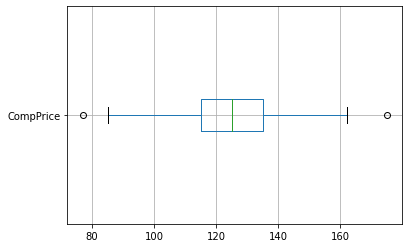

In [9]:
df.boxplot("CompPrice",vert=False)

In [10]:
Q1 = np.percentile(df["CompPrice"],25)

In [11]:
Q3=np.percentile(df["CompPrice"],75)

In [12]:
IQR=Q3-Q1

In [13]:
LW=Q1-(1.5*IQR)
LW

85.0

In [14]:
UW=Q3+(1.5*IQR)

In [15]:
df[df["CompPrice"]<LW].shape

(1, 11)

In [16]:
df[df["CompPrice"]>UW].shape

(1, 11)

In [17]:
df["CompPrice"]=np.where(df["CompPrice"]>UW,UW,np.where(df["CompPrice"]<LW,LW,df["CompPrice"]))

<AxesSubplot:>

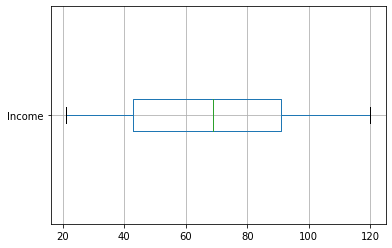

In [18]:
df.boxplot("Income",vert=False)

In [19]:
Q1=np.percentile(df["Income"],25)

In [20]:
Q3=np.percentile(df["Income"],75)

In [21]:
IQR=Q3-Q1

In [22]:
LW=Q1-(1.5*IQR)

In [23]:
UW=Q3+(1.5*IQR)

In [24]:
df[df["Income"]<LW].shape

(0, 11)

In [25]:
df[df["Income"]>UW].shape

(0, 11)

In [26]:
df["Income"]=np.where(df["Income"]>UW,UW,np.where(df["Income"]<LW,LW,df["Income"]))

<AxesSubplot:>

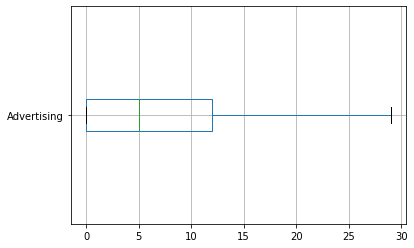

In [27]:
df.boxplot("Advertising",vert=False)


<AxesSubplot:>

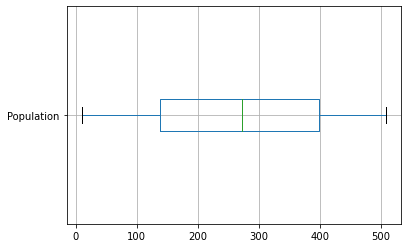

In [28]:
df.boxplot("Population",vert=False)

<AxesSubplot:>

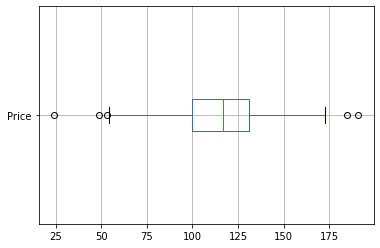

In [29]:
df.boxplot("Price",vert=False)

In [30]:
Q1=np.percentile(df["Price"],25)

In [31]:
Q3=np.percentile(df["Price"],75)

In [32]:
IQR=Q3-Q1

In [33]:
LW=Q1-(1.5*IQR)

In [34]:
UW=Q3+(1.5*IQR)

In [35]:
df[df["Price"]<LW].shape

(3, 11)

In [36]:
df[df["Price"]>UW].shape

(2, 11)

In [37]:
df["Price"]=np.where(df["Price"]>UW,UW,np.where(df["Price"]<LW,LW,df["Price"]))

<AxesSubplot:>

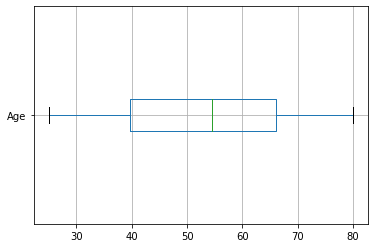

In [38]:
df.boxplot("Age",vert=False)

<AxesSubplot:>

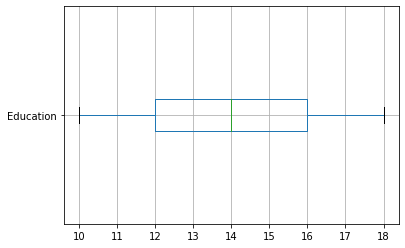

In [39]:
df.boxplot("Education",vert=False)

In [40]:
df["Sales"] = pd.cut(df["Sales"], bins=[0,4.2,8.01,12.01,16.27],labels=["poor","good","very good","excellent"])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,very good,138.0,73.0,11,276,120.0,Bad,42,17,Yes,Yes
1,very good,111.0,48.0,16,260,83.0,Good,65,10,Yes,Yes
2,very good,113.0,35.0,10,269,80.0,Medium,59,12,Yes,Yes
3,good,117.0,100.0,4,466,97.0,Medium,55,14,Yes,Yes
4,poor,141.0,64.0,3,340,128.0,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,excellent,138.0,108.0,17,203,128.0,Good,33,14,Yes,Yes
396,good,139.0,23.0,3,37,120.0,Medium,55,11,No,Yes
397,good,162.0,26.0,12,368,159.0,Medium,40,18,Yes,Yes
398,good,100.0,79.0,7,284,95.0,Bad,50,12,Yes,Yes


In [41]:
Y=df["Sales"]
y = Y.copy()

In [42]:
X=df.iloc[:,1:]
x = X.copy()

In [43]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [44]:
X.dtypes

CompPrice      float64
Income         float64
Advertising      int64
Population       int64
Price          float64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Data preprocessing

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
min_max = MinMaxScaler()

In [47]:
X["CompPrice"] = min_max.fit_transform(X[["CompPrice"]])

In [48]:
X["CompPrice"] = min_max.fit_transform(X[["CompPrice"]])

In [49]:
X["Income"] = min_max.fit_transform(X[["Income"]])

In [50]:
X["Advertising"] = min_max.fit_transform(X[["Advertising"]])

In [51]:
X["Population"] = min_max.fit_transform(X[["Population"]])

In [52]:
X["Price"] = min_max.fit_transform(X[["Price"]])

In [53]:
X["Age"] = min_max.fit_transform(X[["Age"]])

In [54]:
X["Education"] = min_max.fit_transform(X[["Education"]])

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
X["ShelveLoc"] = le.fit_transform(X["ShelveLoc"])

In [58]:
X["ShelveLoc"] = pd.DataFrame(X["ShelveLoc"])

In [59]:
X["Urban"] = le.fit_transform(X["Urban"])

In [60]:
X["Urban"] = pd.DataFrame(X["Urban"])

In [61]:
X["US"] = le.fit_transform(X["US"])

In [62]:
X["US"]=pd.DataFrame(X["US"])

In [63]:
Y=le.fit_transform(df["Sales"])

In [64]:
Y=pd.DataFrame(Y)

## Splitting data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

## Model building & training

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
dt=DecisionTreeClassifier(criterion = 'gini', max_depth = 8).fit(X_train,Y_train)

In [70]:
gsv = GridSearchCV(estimator = dt,param_grid = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14]},cv =5)

In [71]:
gsv.fit(X,Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14]})

In [72]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [73]:
dt

DecisionTreeClassifier(max_depth=8)

In [74]:
Y_predtrain=dt.predict(X_train)

In [75]:
from sklearn import tree
import matplotlib.pyplot as plt

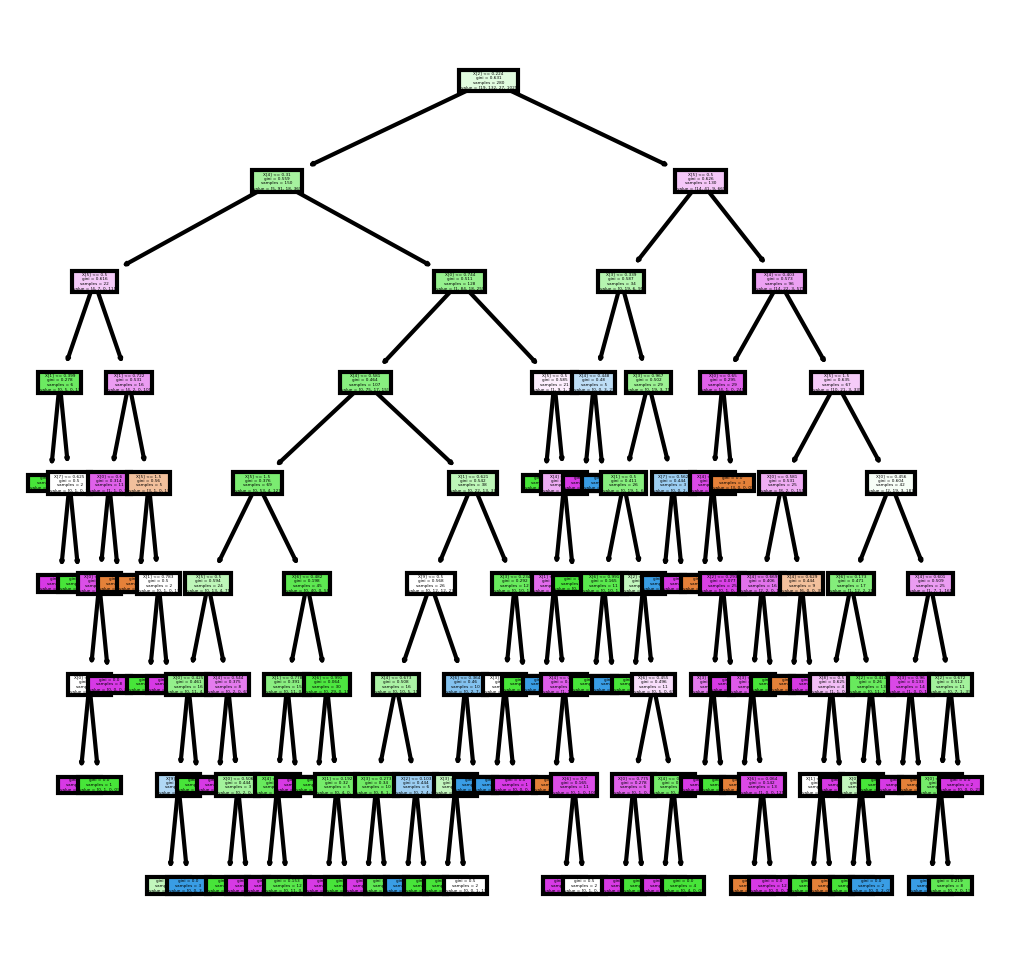

In [76]:
plt.figure(figsize=(4,4),dpi=300)
tree.plot_tree(dt,filled=True)
plt.show()

## Model Evaluation

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [105]:
class_report_train = classification_report(Y_train,Y_predtrain)
print(class_report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.96      1.00      0.98       132
           2       0.96      0.93      0.94        27
           3       1.00      0.95      0.97       102

    accuracy                           0.97       280
   macro avg       0.98      0.97      0.97       280
weighted avg       0.98      0.97      0.97       280



In [79]:
cm1 = confusion_matrix(Y_train,Y_predtrain)
cm1

array([[ 19,   0,   0,   0],
       [  0, 132,   0,   0],
       [  0,   2,  25,   0],
       [  0,   4,   1,  97]], dtype=int64)

In [80]:
ac1 = accuracy_score(Y_train,Y_predtrain) 
ac1

0.975

## Model testing

In [81]:
Y_predtest=dt.predict(X_test)

In [107]:
class_report_test = classification_report(Y_test,Y_predtest)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      0.62      0.63        60
           2       0.20      0.17      0.18        18
           3       0.52      0.68      0.59        34
           4       0.00      0.00      0.00         1

    accuracy                           0.53       120
   macro avg       0.27      0.29      0.28       120
weighted avg       0.50      0.53      0.51       120



In [83]:
cm2 = confusion_matrix(Y_test,Y_predtest)
cm2

array([[ 0,  0,  0,  7,  0],
       [ 1, 37,  9, 13,  0],
       [ 0, 14,  3,  1,  0],
       [ 3,  6,  2, 23,  0],
       [ 0,  0,  1,  0,  0]], dtype=int64)

In [84]:
ac2 = accuracy_score(Y_test,Y_predtest) 
ac2

0.525

## Reducing overfitting problem by using RF classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
bagging = RandomForestClassifier()

In [87]:
bagging.fit(X,Y)

RandomForestClassifier()

In [88]:
y_predbagging = bagging.predict(X_train)

In [96]:
class_report_RF1 = classification_report(Y_train,y_predbagging)
print(class_report_RF1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00       102

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [90]:
confusion_matrix(Y_train,y_predbagging)

array([[ 19,   0,   0,   0],
       [  0, 132,   0,   0],
       [  0,   0,  27,   0],
       [  0,   0,   0, 102]], dtype=int64)

In [91]:
accuracy_score(Y_train,y_predbagging)

1.0

In [92]:
y_predbagging_test = bagging.predict(X_test)

In [97]:
class_report_RF2 = classification_report(Y_test,y_predbagging_test)
print(class_report_RF2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00         1

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [98]:
confusion_matrix(Y_test,y_predbagging_test)

array([[ 7,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

In [99]:
accuracy_score(Y_test,y_predbagging_test)

1.0

In [100]:
data1 = bagging.feature_importances_
data1

array([0.13182541, 0.1227691 , 0.10195129, 0.1131581 , 0.19163618,
       0.10027977, 0.12756204, 0.07291216, 0.01895213, 0.01895382])

In [101]:
data2 = X.columns
data2

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [102]:
result = pd.DataFrame({'Segment':data2,'Importance':data1})
result

,Segment,Importance
0,CompPrice,0.131825
1,Income,0.122769
2,Advertising,0.101951
3,Population,0.113158
4,Price,0.191636
5,ShelveLoc,0.100280
6,Age,0.127562
7,Education,0.072912
8,Urban,0.018952
9,US,0.018954


## Hence we can say that price causes high sale.

## ----------------------------------------------------------The End--------------------------------------------------------- 